<a href="https://colab.research.google.com/github/nikhil-xyz/ImageClassification/blob/main/Classification_with_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image Classification using Transfer** **Learning**

We will be using pre-trained 'beans' dataset for image classification from tensorflow. 

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

import os
import numpy as np

In [2]:
!pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow_datasets as tfds

In [4]:
dataset, info = tfds.load(name='beans', with_info=True, as_supervised=True, split=['train', 'test', 'validation'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/beans/0.1.0.incompletePTL2D8/beans-train.tfrecord*...:   0%|          | 0/1034…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/beans/0.1.0.incompletePTL2D8/beans-validation.tfrecord*...:   0%|          | 0…

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/beans/0.1.0.incompletePTL2D8/beans-test.tfrecord*...:   0%|          | 0/128 […

Dataset beans downloaded and prepared to ~/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [5]:
info

tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
    by experts from the National Crops Resources Research Institute (NaCRRI) in
    Uganda and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_path='~/tensorflow_datasets/beans/0.1.0',
    file_format=tfrecord,
    download_size=171.69 MiB,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=128, num_shards=1>,
        'train': <Sp

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


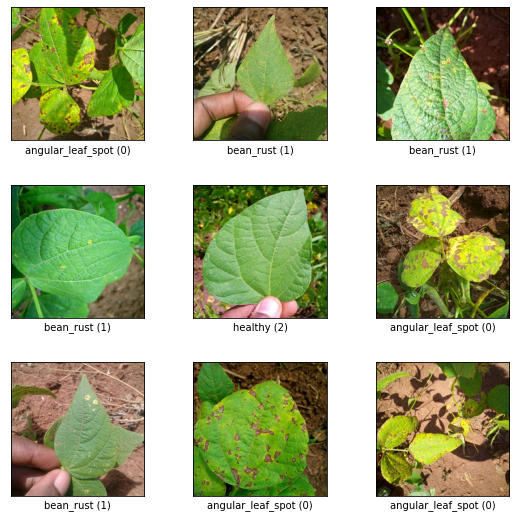

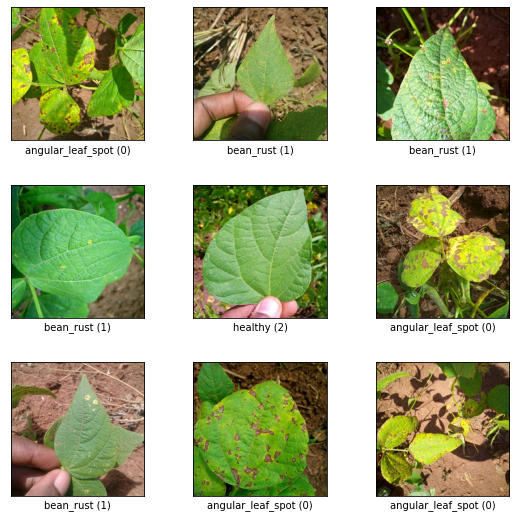

In [6]:
train, info = tfds.load('beans', with_info=True, split='test')
tfds.show_examples(info, train)

In [7]:
def scaling(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.0
  return tf.image.resize(image, [224,224]), tf.one_hot(label, 3)

In [8]:
def get_dataset():
  train = dataset[0].map(scaling).shuffle(1000).batch(32). prefetch(16)
  test = dataset[1].map(scaling).batch(32).prefetch(16)
  val = dataset[2].map(scaling).batch(32). prefetch(16)
  return train, test, val

In [9]:
train, test, val = get_dataset()
train.cache()
val.cache()

<CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [10]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [11]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(224, 224, 3))

In [12]:
feature_extractor_layer.trainable = False

In [13]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


33/33 [==============================] - 18s 143ms/step - loss: 0.8862 - accuracy: 0.6064 - val_loss: 0.5271 - val_accuracy: 0.7744
Epoch 2/10
33/33 [==============================] - 5s 50ms/step - loss: 0.5121 - accuracy: 0.7853 - val_loss: 0.4295 - val_accuracy: 0.8421
Epoch 3/10
33/33 [==============================] - 3s 48ms/step - loss: 0.4130 - accuracy: 0.8414 - val_loss: 0.3731 - val_accuracy: 0.8571
Epoch 4/10
33/33 [==============================] - 3s 51ms/step - loss: 0.3647 - accuracy: 0.8482 - val_loss: 0.3360 - val_accuracy: 0.8647
Epoch 5/10
33/33 [==============================] - 3s 51ms/step - loss: 0.3375 - accuracy: 0.8723 - val_loss: 0.3133 - val_accuracy: 0.8797
Epoch 6/10
33/33 [==============================] - 3s 49ms/step - loss: 0.2889 - accuracy: 0.8830 - val_loss: 0.2974 - val_accuracy: 0.9023
Epoch 7/10
33/33 [==============================] - 3s 51ms/step - loss: 0.2712 - accuracy: 0.8965 - val_loss: 0.2852 - val_accuracy: 0.9023
Epoch 8/10
33/33 [====

In [18]:
model.evaluate(test)

4/4 [==============================] - 1s 110ms/step - loss: 0.2510 - accuracy: 0.8828


[0.2509749233722687, 0.8828125]

1/1 [==============================] - 0s 19ms/step
[[0.980842   0.8431645  0.00418519]]


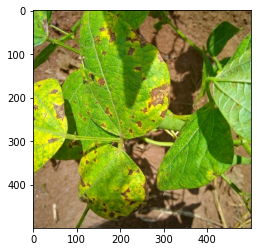

Actual Label : angular_leaf_spot
Predicted Label : angular_leaf_spot
1/1 [==============================] - 0s 18ms/step
[[0.15659493 0.97397226 0.11632406]]


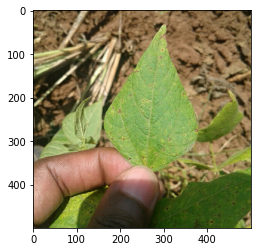

Actual Label : bean_rust
Predicted Label : bean_rust
1/1 [==============================] - 0s 22ms/step
[[0.5753421  0.6025016  0.24238865]]


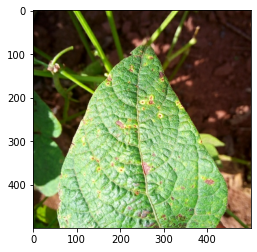

Actual Label : bean_rust
Predicted Label : bean_rust
1/1 [==============================] - 0s 25ms/step
[[0.1583995  0.7492968  0.90818197]]


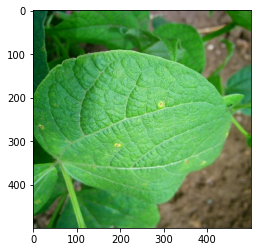

Actual Label : bean_rust
Predicted Label : healthy
1/1 [==============================] - 0s 27ms/step
[[0.07106185 0.37392387 0.9878213 ]]


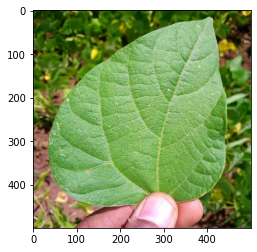

Actual Label : healthy
Predicted Label : healthy


In [26]:
for sample in dataset[1].take(5):
  image, label = sample[0], sample[1]
  imgScaled, labelArr = scaling(sample[0], sample[1])
  imgScaled = np.expand_dims(imgScaled, axis=0)

  img = tf.keras.preprocessing.image.img_to_array(image)
  predImg = model.predict(imgScaled)
  print(predImg)
  plt.figure()
  plt.imshow(image)
  plt.show()
  print("Actual Label : %s" % info.features["label"].names[label.numpy()])
  print("Predicted Label : %s" % info.features["label"].names[np.argmax(predImg)])



In [28]:
for f0, f1 in dataset[1].map(scaling).batch(200):
  y = np.argmax(f1, axis=1)
  y_pred = np.argmax(model.predict(f0), axis=1)
  print(tf.math.confusion_matrix(labels=y, predictions=y_pred, num_classes=3)) 

4/4 [==============================] - 0s 50ms/step
tf.Tensor(
[[39  4  0]
 [ 5 37  1]
 [ 0  5 37]], shape=(3, 3), dtype=int32)
